<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumGates_ifGate_QiskitAerSimulator_mkbahk_20250123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]=='1.2.4'
#%pip install qiskit_ibm_runtime=='0.30.0'
%pip install qiskit_aer=='0.15.1'
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e1ecfef6f99fddd43130a761ab08371ab0b774868a54b8f121be48c4e71fa201
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.1 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [ ]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [2]:
from qiskit_aer import AerSimulator
backend = AerSimulator(method="statevector") # 'automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop'
print(backend)

AerSimulator('aer_simulator_statevector')


In [3]:
print(backend.configuration().basis_gates)

['ccx', 'ccz', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'diagonal', 'ecr', 'h', 'id', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'store', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'break_loop', 'continue_loop', 'delay', 'for_loop', 'if_else', 'initialize', 'kraus', 'qerror_loc', 'quantum_channel', 'reset', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_probabilities', 'save_probabilities_dict', 'save_state', 'save_statevector', 'save_statevector_dict', 'set_statevector', 'switch_case', 'while_loop']



# if-Gate
* if-Gate는 조건문과 유사한 역할
* 고전 컴퓨팅에서 조건문이 특정 조건에 따라 명령을 실행하거나 실행하지 않는 데 사용되는 것처럼, * 양자컴퓨팅에서도 특정 조건에 따라 양자 게이트를 적용할지 결정
* 그러나 양자컴퓨팅의 조건문은 고전적인 조건문과 다르게 양자 상태와 측정 결과를 기반으로 작동
* 물리적으로 멀리 떨어진 큐빗간 얽힘시 SWAP로 연결로 인한 에러방지용 Qiskit Dynamic Circuit 형성시 사용



In [7]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import math
qr = QuantumRegister(1, 'qr')
cr = ClassicalRegister(1, 'cr')
GateCircuit = QuantumCircuit(qr, cr)
GateCircuit.h(qr[0])
GateCircuit.measure(qr[0], cr[0])

GateCircuit.x(qr[0]).c_if(cr, 1)
print(GateCircuit)

      ┌───┐┌─┐ ┌───┐ 
  qr: ┤ H ├┤M├─┤ X ├─
      └───┘└╥┘ └─╥─┘ 
            ║ ┌──╨──┐
cr: 1/══════╩═╡ 0x1 ╞
            0 └─────┘


In [8]:
from qiskit.quantum_info import Operator
unitary = Operator(GateCircuit)
print(unitary)

QiskitError: 'Cannot apply operation with classical bits: measure'

In [ ]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(unitary)

<IPython.core.display.Latex object>

In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

qc.reset(qreg_q[0])
qc.x(qreg_q[0])
qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
qc.measure(qreg_q[0], creg_c[0])
qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5])
qc.x(qreg_q[5]).c_if(creg_c, 1)
qc.measure(qreg_q[5], creg_c[1])

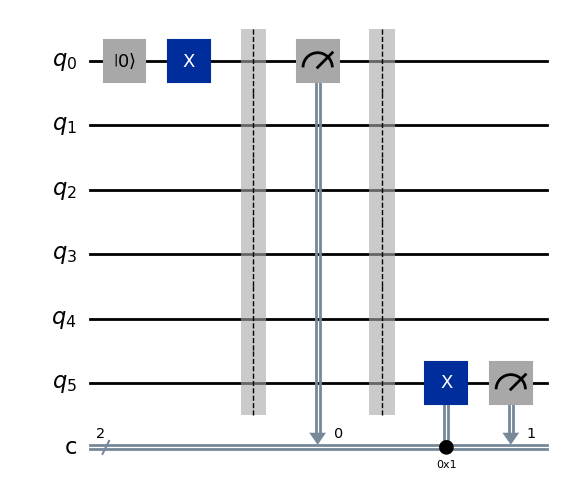

In [10]:
qc.draw(output='mpl')

In [11]:
job = backend.run(qc, shots=1024)
result = job.result()

In [12]:
result

Result(backend_name='aer_simulator_statevector', backend_version='0.15.1', qobj_id='', job_id='9fcb5c9f-0ee0-4ba8-bc7c-78f6d5e94f61', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 1024}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=6, name='circuit-170', qreg_sizes=[['q', 6]], metadata={}), status=DONE, seed_simulator=3285156282, metadata={'time_taken': 0.018872563, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[5, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'active_input_qubits': [0, 5], 'num_clbits': 2, 'remapped_qubits': True, 'parallel_shots': 2, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': False, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.0

In [13]:
result.results

[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 1024}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=6, name='circuit-170', qreg_sizes=[['q', 6]], metadata={}), status=DONE, seed_simulator=3285156282, metadata={'time_taken': 0.018872563, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[5, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'active_input_qubits': [0, 5], 'num_clbits': 2, 'remapped_qubits': True, 'parallel_shots': 2, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': False, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.018872563)]

In [14]:
result.results[0].data.counts

{'0x3': 1024}

In [15]:
result.get_counts()

{'11': 1024}

In [16]:
counts = result.get_counts()
print(counts)

{'11': 1024}


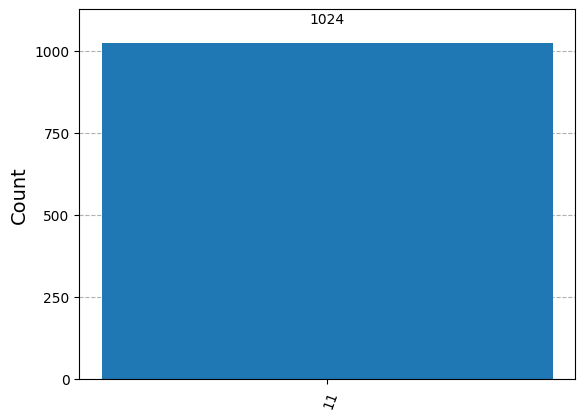

In [17]:
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector,plot_state_paulivec, plot_state_hinton, plot_state_qsphere
plot_histogram(counts)